In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('weather_by_cities.csv')
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [5]:
cities = np.array(df.city)
np.unique(cities)

array(['mumbai', 'new york', 'paris'], dtype=object)

In [17]:
g = df.groupby('city')
for city,city_df in g:t
    print(city,"-->",city_df.temperature.max())

mumbai --> 92
new york --> 36
paris --> 54


In [18]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [19]:
g.get_group('paris')

,day,city,temperature,windspeed,event
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy
10,1/3/2017,paris,54,8,Cloudy
11,1/4/2017,paris,42,10,Cloudy


In [20]:
g.get_group('new york')

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny


In [24]:
rt = g.max()
rt

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [28]:
rt.loc['mumbai']

day            1/4/2017
temperature          92
windspeed            15
event             Sunny
Name: mumbai, dtype: object

In [30]:
rt.loc['mumbai'].temperature

92

In [27]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


In [31]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [32]:
g.median()

,temperature,windspeed
city,,
mumbai,88.5,8.5
new york,32.5,7.0
paris,47.5,11.5


In [33]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [34]:
%matplotlib inline

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

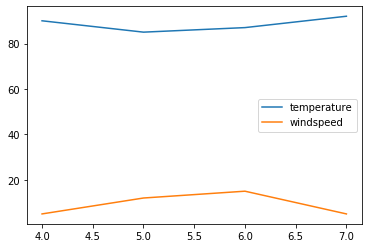

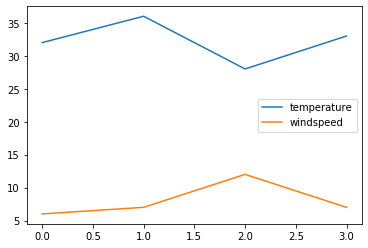

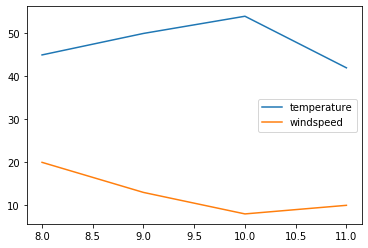

In [35]:
g.plot()

In [36]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [39]:
new_g = df.groupby('Animal')
for animal,data in new_g:
    print(animal)
    print(data)

Falcon
   Animal  Max Speed
0  Falcon      380.0
1  Falcon      370.0
Parrot
   Animal  Max Speed
2  Parrot       24.0
3  Parrot       26.0


In [40]:
new_g.mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [41]:
new_g.max()

,Max Speed
Animal,
Falcon,380.0
Parrot,26.0


# Concat Dataframes

In [43]:
india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [44]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [45]:
pd.concat([india_weather, us_weather], ignore_index=True)

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [48]:
df = pd.concat([india_weather, us_weather], keys=['india','us'])
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [49]:
df.loc['india']

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [50]:
df.loc['us']

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [51]:
temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [52]:

windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
windspeed_df

,city,windspeed
1,delhi,7
0,mumbai,12


In [55]:
df = pd.concat([temperature_df,windspeed_df], axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


In [56]:
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [57]:
s = pd.Series(['Humid','Rain','Dry'],name ="event")
s

0    Humid
1     Rain
2      Dry
Name: event, dtype: object

In [58]:
df = pd.concat([temperature_df,s],axis=1)

In [59]:
df

,city,temperature,event
0,mumbai,32,Humid
1,delhi,45,Rain
2,banglore,30,Dry


# Merge DataFrames

In [60]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [61]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [62]:
df3 = pd.merge(df1,df2,on="city")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [63]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [64]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [68]:
df3 = pd.merge(df1,df2,on="city")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [73]:
df3 = pd.merge(df1,df2,on="city",how="outer",indicator=True)
df3

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


In [70]:
df3 = pd.merge(df1,df2,on="city",how="inner")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [74]:
df3 = pd.merge(df1,df2,on="city",how="left",indicator=True)
df3

,city,temperature,humidity,_merge
0,new york,21,68.0,both
1,chicago,14,65.0,both
2,orlando,35,NaN,left_only
3,baltimore,38,NaN,left_only


In [72]:
df3 = pd.merge(df1,df2,on="city",how="right")
df3

,city,temperature,humidity
0,new york,21.0,68
1,chicago,14.0,65
2,san diego,NaN,71
